# IDS Assignment 1

This is a Jupyter Notebook created for the analysis on the given dataset for the IDS assignment #1. The assignment is done collaborately by the group of 4 members. The details are as follows,

Group ID : `IDS_GROUP006`

Group Members: 
    1. Venkataramanan K
    2. Bala Kavin Pon
    3. Ponvani
    4. Poornima J


## Problem statement 


**Business Context**

Using the given data set for New York City Current Job Posting data.
 
**Business Problem Understanding**

Focus on applying the learnt data analytics concepts and try to share your findings on following aspects:
1.	What are the highest paid Skills in the US market?
2.	What are the job categories, which involve above mentioned niche skills?
3.	Applying clustering concepts, please depict visually what are the different salary ranges based on job category and years of experience

The analysis on the data is done in the following sequence of steps. 

## Step0: Import libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Step1: Data Preparation

### Loading a data from file


In [16]:
# Reading data from the CSV file
job_data = pd.read_csv("input/jobs.csv", delimiter=",")

# Gist of data
job_data.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-11-26T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-11-26T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-11-26T00:00:00.000


### Information about the data

The scheme of the data can be explored by examining the information about the dataset such as number of entries, column count, data type of the columns and the null constraints. 


In [15]:
job_data.info()
print("---"*40)
job_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 28 columns):
Job ID                           3020 non-null int64
Agency                           3020 non-null object
Posting Type                     3020 non-null object
# Of Positions                   3020 non-null int64
Business Title                   3020 non-null object
Civil Service Title              3020 non-null object
Title Code No                    3020 non-null object
Level                            3020 non-null object
Job Category                     3018 non-null object
Full-Time/Part-Time indicator    2811 non-null object
Salary Range From                3020 non-null float64
Salary Range To                  3020 non-null float64
Salary Frequency                 3020 non-null object
Work Location                    3020 non-null object
Division/Work Unit               3020 non-null object
Job Description                  3020 non-null object
Minimum Qual Requirements    

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,3020.000000,3020.000000,3020.000000,3020.000000,0.0
mean,383678.501987,2.424172,58140.495550,84325.707875,NaN
std,51779.379258,8.149189,26806.810446,43186.883961,NaN
min,87990.000000,1.000000,0.000000,10.360000,NaN
25%,378264.750000,1.000000,48535.000000,60990.000000,NaN
50%,402960.500000,1.000000,57944.000000,81535.000000,NaN
75%,415741.000000,1.000000,72476.000000,105000.000000,NaN
max,424117.000000,190.000000,218587.000000,234402.000000,NaN


Checking whether there are any missing values in the given dataset using `isnull()` method.

In [45]:
job_data.isnull().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Code No                       0
Level                               0
Job Category                        2
Full-Time/Part-Time indicator     209
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          16
Preferred Skills                  439
Additional Information           1180
To Apply                            1
Hours/Shift                      2097
Work Location 1                  1598
Recruitment Contact              3020
Residency Requirement               2
Posting Date                        2
Post Until                       2048
Posting Upda

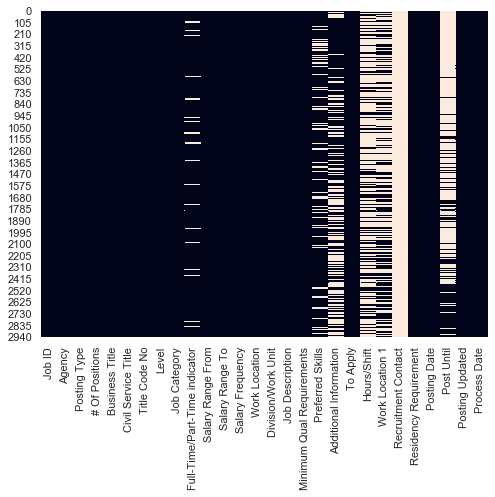

In [60]:
# Figure size
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(job_data.isnull(), cbar=False)

### Step2: Identification of Variables

The variables need to be identified for further processing and analysis. The variables can be identified two ways,
1. Variables with minimum percentage of null values. Here **30%** of total dataset volume will be allowed as null or NaN values. The variables that are more than 30% will not be considered for analysis. 
2. The date attributes will also not contribute for analysis so they will be removed. 


In [104]:
null_ratio = job_data.shape[0] * 0.3 # Minimum # number of records without null or NaN values
identified_cols = list()

data_with_null = job_data.isnull().sum() # Columns with null value count
try:
    for items in null_counts.iteritems(): # Iterate through the pd.Series object
        if items[1] < null_ratio:
            if job_data[items[0]].dtype in ('int64','object','float64'):
                identified_cols.append(items[0])
except ValueError as ve:
    pass

print(len(identified_cols))

20


In [40]:
job_data['Posting Date'] = pd.to_datetime(job_data['Posting Date'])
job_data['Process Date'] = pd.to_datetime(job_data['Process Date'])
job_data['Post Until'] = pd.to_datetime(job_data['Post Until'])
job_data['Posting Updated'] = pd.to_datetime(job_data['Posting Updated'])

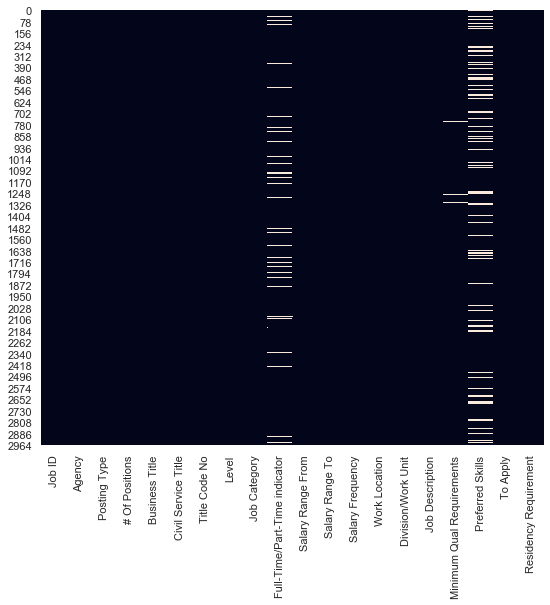

In [109]:
# Figure size
sns.set(rc={'figure.figsize':(9,8)})
sns.heatmap(job_data[identified_cols].isnull(), cbar=False)

In [118]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
X_fields = ['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title', 'Civil Service Title', 'Title Code No', 'Level', 'Job Category', 'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To', 'Salary Frequency']

y = job_data['Job Category']
X = job_data[X_fields]

# X.head()

# svc_model = LinearSVC(C=0.01, penalty='l1', dual=False).fit(X, y)